# Pre Processing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import random as rd
import sys
import copy

In [ ]:
from google.colab import drive
drive.mount ('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#read data kendaraan
data_kendaraan = pd.read_csv('/content/drive/My Drive/TB PEMBELAJARAN MESIN/kendaraan_train.csv')
data_kendaraan.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


### Informasi Dataset

In [ ]:
#describe data kendaraan
data_kendaraan.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
data_kendaraan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
#searching jumlah data kosong/null
data_kendaraan.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

## Eksplorasi Data

In [ ]:
#delete label yang tidak diperlukan
data_kendaraan.drop(['id', 'Tertarik'], axis='columns', inplace=True)
data_kendaraan.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0


In [ ]:
#ubah tipe data pada label Kendaraan_Rusak
replace_data = {"Kendaraan_Rusak": {"Pernah": 1, "Tidak": 0}}
data_kendaraan.replace(replace_data, inplace=True)
data_kendaraan.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,0.0,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,1.0,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,0.0,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,0.0,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0


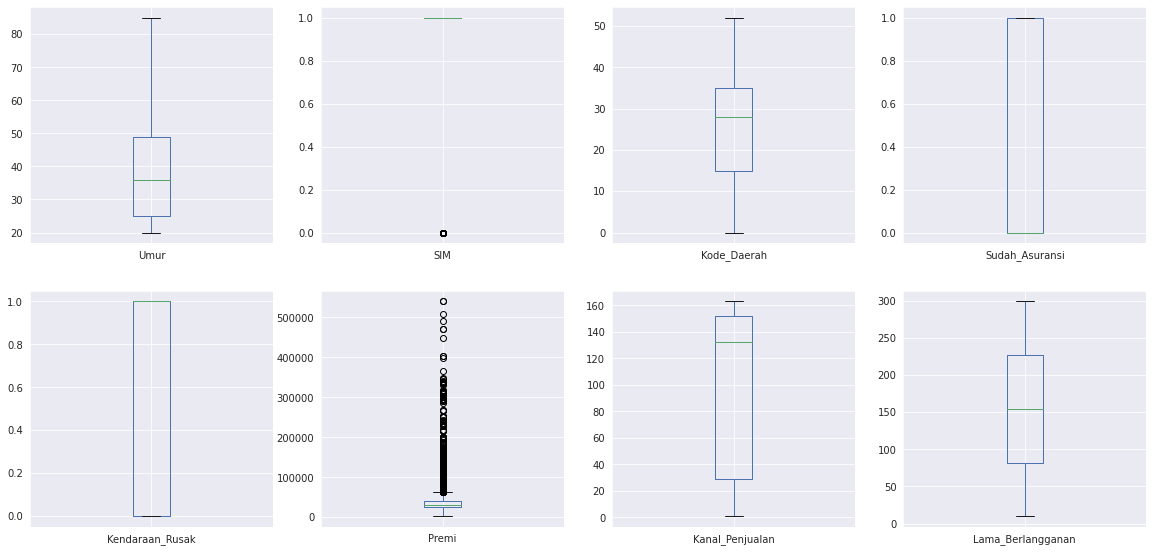

In [ ]:
#search outlier

data_kendaraan.plot(kind="box", subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,20))
plt.show()

## Persiapan Data

In [ ]:
#mengisi nilai null dengan metode imputation
data_kendaraan['Umur'].fillna(data_kendaraan['Umur'].mean(), inplace=True)
data_kendaraan['SIM'].fillna(data_kendaraan['SIM'].mean(), inplace=True)
data_kendaraan['Kode_Daerah'].fillna(data_kendaraan['Kode_Daerah'].mean(), inplace=True)
data_kendaraan['Sudah_Asuransi'].fillna(data_kendaraan['Sudah_Asuransi'].mean(), inplace=True)
data_kendaraan['Premi'].fillna(data_kendaraan['Premi'].mean(), inplace=True)
data_kendaraan['Kanal_Penjualan'].fillna(data_kendaraan['Kanal_Penjualan'].mean(), inplace=True)
data_kendaraan['Lama_Berlangganan'].fillna(data_kendaraan['Lama_Berlangganan'].mean(), inplace=True)

data_kendaraan['Jenis_Kelamin'].fillna(data_kendaraan['Jenis_Kelamin'].mode()[0], inplace=True)
data_kendaraan['Umur_Kendaraan'].fillna(data_kendaraan['Umur_Kendaraan'].mode()[0], inplace=True)
data_kendaraan['Kendaraan_Rusak'].fillna(data_kendaraan['Kendaraan_Rusak'].mode()[0], inplace=True)

data_kendaraan.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

In [ ]:
data_kendaraan = pd.get_dummies(data_kendaraan).astype('float64')
data_kendaraan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Umur                      285831 non-null  float64
 1   SIM                       285831 non-null  float64
 2   Kode_Daerah               285831 non-null  float64
 3   Sudah_Asuransi            285831 non-null  float64
 4   Kendaraan_Rusak           285831 non-null  float64
 5   Premi                     285831 non-null  float64
 6   Kanal_Penjualan           285831 non-null  float64
 7   Lama_Berlangganan         285831 non-null  float64
 8   Jenis_Kelamin_Pria        285831 non-null  float64
 9   Jenis_Kelamin_Wanita      285831 non-null  float64
 10  Umur_Kendaraan_1-2 Tahun  285831 non-null  float64
 11  Umur_Kendaraan_< 1 Tahun  285831 non-null  float64
 12  Umur_Kendaraan_> 2 Tahun  285831 non-null  float64
dtypes: float64(13)
memory usage: 28.3 MB


In [ ]:
#data cleaning

q1, q3 = np.percentile (data_kendaraan['Premi'], [25,75])
iqr = q3 - q1

upper_lim = q3 + (1.5 * iqr)
lower_lim = q1 + (1.5 * iqr)

outliers = data_kendaraan['Premi'][(data_kendaraan['Premi'] > lower_lim) & (data_kendaraan['Premi'] < upper_lim)]
outliers


36        46045.0
52        52768.0
67        52294.0
73        54295.0
88        49594.0
           ...   
285791    52138.0
285800    57295.0
285803    52168.0
285825    48301.0
285828    49751.0
Name: Premi, Length: 26549, dtype: float64

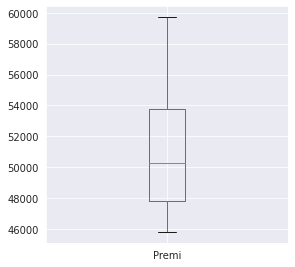

In [ ]:
outliers.plot(kind="box", subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,20))
plt.show()

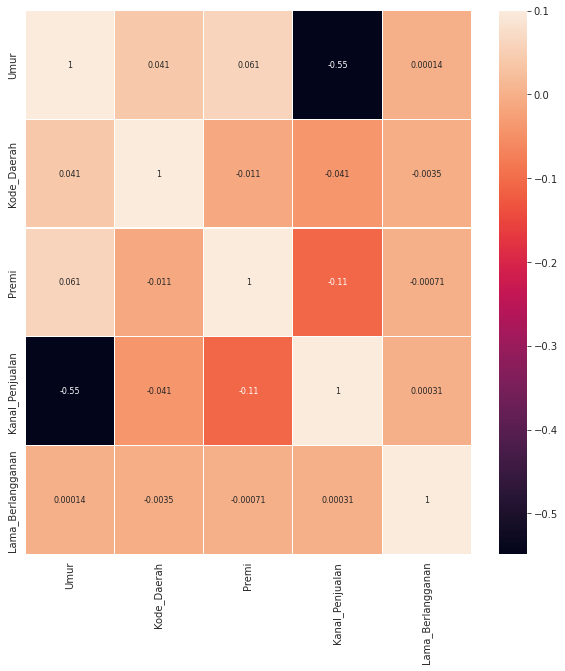

In [ ]:
df = data_kendaraan[['Umur','Kode_Daerah','Premi','Kanal_Penjualan','Lama_Berlangganan']].corr()
sns.set({'figure.figsize':(10,10)})
sns.heatmap(df, linewidths=.05, vmax=0.1, annot=True, annot_kws={"fontsize":8})

In [ ]:
#split data
x = "Umur"
y = "Premi"
df = data_kendaraan.loc[:,[x, y]]
df

,Umur,Premi
0,30.0,28029.0
1,48.0,25800.0
2,21.0,32733.0
3,58.0,2630.0
4,50.0,34857.0
...,...,...
285826,23.0,25988.0
285827,21.0,44686.0
285828,23.0,49751.0
285829,68.0,30503.0


In [ ]:
#scaling data
Skala = MinMaxScaler()
normalisasi = Skala.fit_transform(df)
df.loc[:, [column for column in df.columns]] = normalisasi
df

,Umur,Premi
0,0.153846,0.047251
1,0.430769,0.043104
2,0.015385,0.056002
3,0.584615,0.000000
4,0.461538,0.059953
...,...,...
285826,0.046154,0.043454
285827,0.015385,0.078239
285828,0.046154,0.087661
285829,0.738462,0.051853


# Pemodelan (K Means)

In [ ]:
# Menentukan centroid secara random dan menentukan pusat cluster
def Inisiasi_Centroid(df,x,y,k):
  rd.seed(10)
  centroids = {i + 1 : [rd.choices(df[x]),rd.choices(df[y])] for i in range(k)}
  return centroids
k=2
cen = Inisiasi_Centroid(df,x,y,k)

#Menghitung Jarak Cluster
def Jarak(df,x,y,centroid):
  for i in centroid.keys():
    df[str(i)] = np.sqrt((df[x] - centroid[i][0]) ** 2 + (df[y] - centroid[i][1]) ** 2) 
  return df 
df2 = Jarak(df,x,y,cen)
df2

#menentukan pusat cluster
def group_object(df,centroid):
  colmap = ['pink','orange','green','red','purple','brown','blue','gray','olive','cyan','black']
  df['index cluster']= (df.loc[:, ['{}'.format(i)for i in centroid.keys()]].idxmin(axis=1)).astype('int')
  df['color'] = df['index cluster'].map(lambda x: colmap[x])
  return df

df2 = group_object(df,cen)
df2

#menentukan pusat cluster baru
def Centroid_Baru(df,centroid):
  for i in centroid.keys():
    centroid[i][0] = np.mean(df[df['index cluster'] == i][x])
    centroid[i][1] = np.mean(df[df['index cluster'] == i][y])
  return centroid

#fungsi utama
def clusterisasi(df,x,y,k):
  centroid = Inisiasi_Centroid(df,x,y,k)
  df2 = copy.deepcopy(df)
  df2 = Jarak(df2,x,y,centroid)
  df2 = group_object(df2,centroid)
  centroid = Centroid_Baru(df2,centroid)
  while (True):
    oldcentroid = copy.deepcopy(centroid)
    df2 = Jarak(df2,x,y,centroid)
    df2 = group_object(df2,centroid)
    centroid = Centroid_Baru(df2,centroid)
    if (oldcentroid == centroid):
      break
  return (df2,centroid)

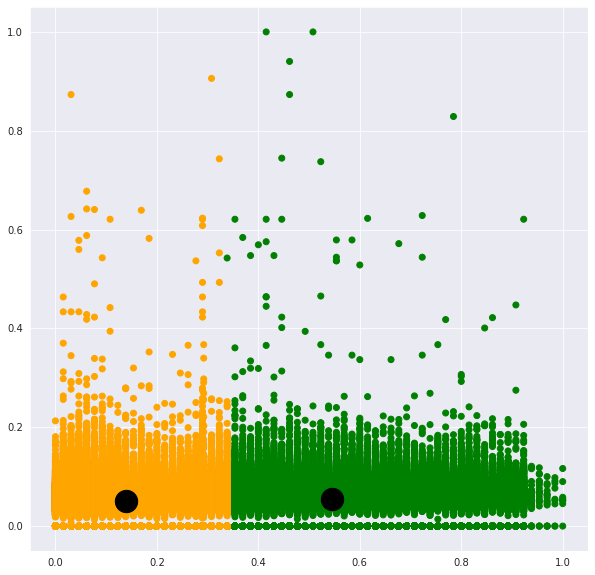

In [ ]:
#menentukan jumlah k
k=2
df2, centroid = clusterisasi(df,x,y,k)
plt.scatter(df2[x], df2[y], color=df2['color'])
for i in centroid:
  plt.scatter(*centroid[i],color='black', s=500)
plt.show()

# Evaluasi

In [ ]:
def Cluster_Model(df_scale,centroid):
  sum = 0 
  for i in range(len(centroid)):
    j=i+1
    k=df_scale[(df_scale['index cluster']==j)]['{}'.format(j)]**2
    sum += k.sum()
  return sum

inertia=[]
for i in range(10):
  df2, centroid = clusterisasi(df,x,y,i+1)
  inertia.append(Cluster_Model(df2,centroid))

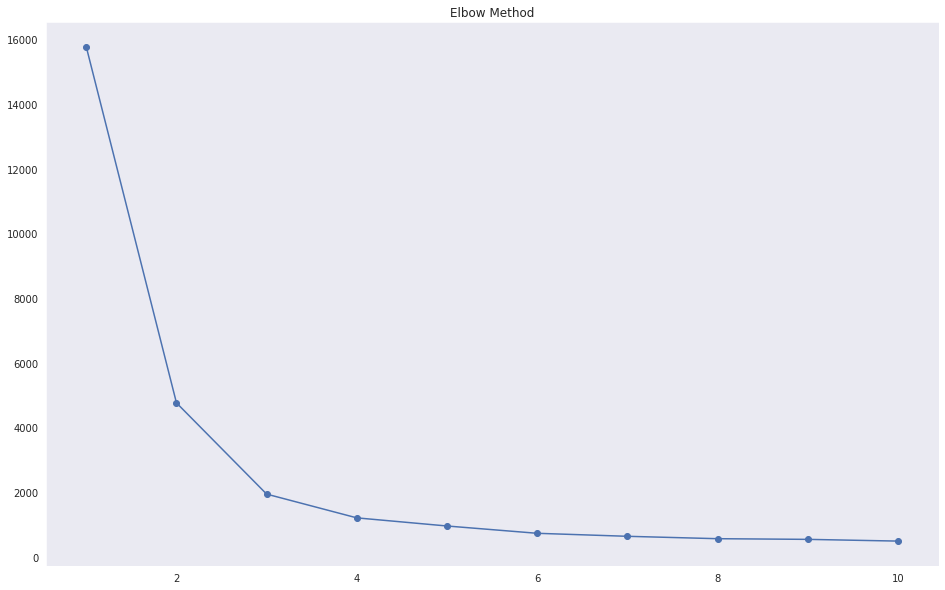

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(range(1,11),inertia,'o-',)
plt.title('Elbow Method')
plt.grid()
plt.show()

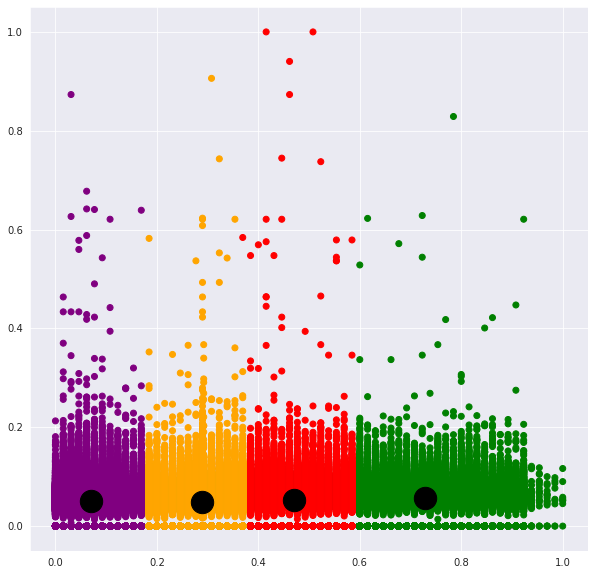

In [ ]:
k=4
df2, centroid = clusterisasi(df,x,y,k)
plt.scatter(df2[x], df2[y], color=df2['color'])
for i in centroid:
  plt.scatter(*centroid[i],color='black', s=500)
plt.show()

# Eksperimen

In [ ]:
x = "Umur"
y = "Kanal_Penjualan"
df_x = data_kendaraan.loc[:,[x, y]]
df_x

,Umur,Kanal_Penjualan
0,30.0,152.0
1,48.0,29.0
2,21.0,160.0
3,58.0,124.0
4,50.0,88.0
...,...,...
285826,23.0,152.0
285827,21.0,152.0
285828,23.0,152.0
285829,68.0,124.0


In [ ]:
Skala = MinMaxScaler()
normalisasi = Skala.fit_transform(df_x)
df.loc[:, [column for column in df_x.columns]] = normalisasi
df_x

,Umur,Kanal_Penjualan
0,30.0,152.0
1,48.0,29.0
2,21.0,160.0
3,58.0,124.0
4,50.0,88.0
...,...,...
285826,23.0,152.0
285827,21.0,152.0
285828,23.0,152.0
285829,68.0,124.0


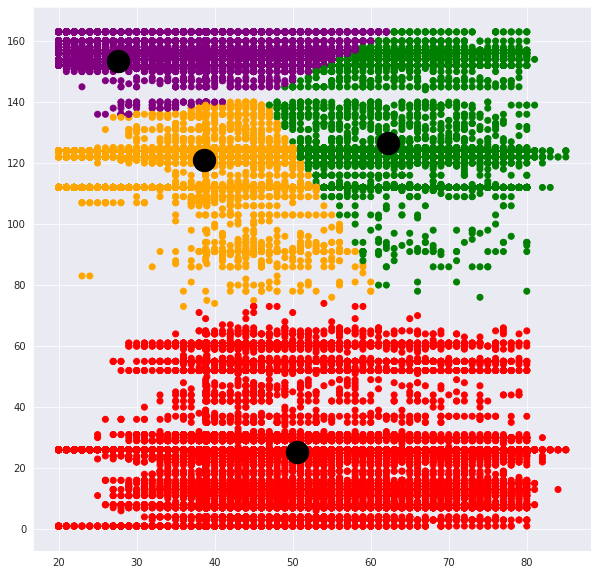

In [ ]:
k=4
df2, centroid = clusterisasi(df_x,x,y,k)
plt.scatter(df2[x], df2[y], color=df2['color'])
for i in centroid:
  plt.scatter(*centroid[i],color='black', s=500)
plt.show()